In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# df = pd.read_csv('csvs/img_times_091324.csv', index_col=0)
# df.columns = ['pi', 'datetime']
# df['datetime'] = pd.to_datetime(df['datetime'])

In [25]:

df = pd.read_csv('/home/mpgetz/repos/bee_cam/filenames_011625.txt', header=None)
df.columns = ['filepath']
# df['datetime'] = pd.to_datetime(df['datetime'])

In [26]:
df['pi'] = df['filepath'].str.extract(r'pi(\d+)')
df['datetime'] = pd.to_datetime(df['filepath'].str.extract(r'_(\d{8}_\d{6})')[0], format='%Y%m%d_%H%M%S')
df['datetime'] = pd.to_datetime(df['datetime'])
df['pi'] = df['pi'].astype(int)
df = df.drop(columns='filepath')
df = df[df['datetime'] >= '2024-07-11']

In [27]:
df

,pi,datetime
0,1,2024-07-11 05:02:04
1,1,2024-07-11 05:02:06
2,1,2024-07-11 05:02:08
3,1,2024-07-11 05:02:11
4,1,2024-07-11 05:02:13
...,...,...
18414537,9,2024-09-08 14:52:24
18414538,9,2024-09-08 14:52:25
18414539,9,2024-09-08 14:52:26
18414540,9,2024-09-08 14:52:27


In [28]:
trtmnt = pd.read_csv('csvs/bee_cam_treatments.csv')
trtmnt.columns = ['date', 'pi', 'color']
trtmnt['date'] = pd.to_datetime(trtmnt['date'], format="%m/%d")
trtmnt['date'] = trtmnt['date'].apply(lambda x: x.replace(year=2024, hour=0, minute=0))
trtmnt['date'] = trtmnt['date'].replace('2024-07-23', '2024-07-24')
trtmnt.loc[trtmnt['date'] == '2024-08-15', 'date'] = pd.to_datetime('2024-08-15 17:00')
trt_pivot = trtmnt.pivot(index='date', columns='pi', values='color')

In [29]:
trtmnt = trtmnt.sort_values(by=['pi', 'date'])
trtmnt['end_date'] = trtmnt.groupby('pi')['date'].shift(-1)
trtmnt['end_date'].fillna(pd.Timestamp('2024-09-10 00:00'), inplace=True)
trtmnt['interval'] = trtmnt.apply(lambda row: pd.Interval(left=row['date'], right=row['end_date'], closed='left'), axis=1)
stim_intervals = trtmnt[['pi', 'color', 'interval']].reset_index(drop=True)
stim_intervals.to_csv('stimulus_intervals.csv', index=False)

In [30]:
stim_intervals

,pi,color,interval
0,1,cnt,"[2024-07-10, 2024-07-18)"
1,1,grn,"[2024-07-18, 2024-07-24)"
2,1,blv,"[2024-07-24, 2024-08-15 17:00:00)"
3,1,grn,"[2024-08-15 17:00:00, 2024-09-03)"
4,1,blv,"[2024-09-03, 2024-09-10)"
5,2,blv,"[2024-07-10, 2024-07-18)"
6,2,blv,"[2024-07-18, 2024-07-24)"
7,2,cnt,"[2024-07-24, 2024-08-15 17:00:00)"
8,2,blv,"[2024-08-15 17:00:00, 2024-09-03)"
9,2,cnt,"[2024-09-03, 2024-09-10)"


In [31]:
df['color'] = None
for _, row in stim_intervals.iterrows():
    mask = (df['pi'] == row['pi']) & (df['datetime'].between(row['interval'].left, row['interval'].right))
    df.loc[mask, 'color'] = row['color']

In [32]:
# all_dates = pd.date_range(start=trt_pivot.index.min(), end=trt_pivot.index.max()+pd.DateOffset(days=5), freq='D')
# trtmnt_all = trt_pivot.reindex(all_dates).fillna(method='ffill')
# trt = trtmnt_all.reset_index()
# trtmnt_long = pd.melt(trt, id_vars=['index'], var_name='pi', value_name='color')
# trtmnt_long.columns = ['date', 'pi', 'color']

# df['date'] = pd.to_datetime(df['datetime']).dt.date
# trtmnt_long['date'] = pd.to_datetime(trtmnt_long['date']).dt.date

In [33]:
df['color'].unique()

array(['cnt', 'blv', 'blu', 'grn', 'yel'], dtype=object)

In [34]:
df[df['color'].isna()]

,pi,datetime,color


In [35]:
# dt_treat = pd.merge(df, trtmnt_long[['pi', 'date', 'color']], on=['pi', 'date'], how='left')

In [36]:
from datetime import time

test = df[(df['pi'] == 4) &
                 (df['datetime'].dt.date == pd.to_datetime('2024-08-15').date()) &
                 (df['datetime'].dt.time.between(time(16,30), time(17,10)))]

In [46]:
df = df.sort_values(['pi', 'datetime'])
df['time_diff'] = df.groupby('pi')['datetime'].diff()
df['session_start'] = df['time_diff'].dt.total_seconds().fillna(0) >= 15
df['session_id'] = df.groupby('pi')['session_start'].cumsum()
# valid_sessions = df.groupby(['pi', 'session_id']).filter(lambda x: x['datetime'].max() - x['datetime'].min() >= pd.Timedelta(seconds=15))
result_df = df.groupby(['pi', 'session_id']).agg(
    start_time=('datetime', 'min'),
    end_time=('datetime', 'max'),
    most_frequent_color=('color', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()
result_df['interval'] = result_df.apply(lambda row: pd.Interval(left=row['start_time'], right=row['end_time'], closed='both'), axis=1)
result_df = result_df[['pi', 'interval', 'most_frequent_color']]
result_df.columns = ['pi', 'interval', 'color']

In [55]:
# result_df['runtime'] = result_df['interval'].apply(lambda x: x.length.total_seconds() / 3600)
# total_runtime_by_color = result_df.groupby('color')['runtime'].sum()
# total_runtime_by_color

color
blu    1136.879167
blv    1109.748889
cnt    1237.140000
grn    1112.259167
yel    1035.249444
Name: runtime, dtype: float64

In [58]:
# df[(df['pi'] == 5) & (df['datetime'].dt.date == pd.to_datetime('2024-09-03').date())]

,pi,datetime,color,time_diff,session_start,session_id
17176368,5,2024-09-03 09:35:33,yel,8 days 23:23:17,True,51
17176369,5,2024-09-03 09:35:34,yel,0 days 00:00:01,False,51
17176370,5,2024-09-03 09:35:35,yel,0 days 00:00:01,False,51
17176371,5,2024-09-03 09:35:36,yel,0 days 00:00:01,False,51
17176372,5,2024-09-03 09:35:37,yel,0 days 00:00:01,False,51
...,...,...,...,...,...,...
17177002,5,2024-09-03 09:46:37,yel,0 days 00:00:01,False,51
17177003,5,2024-09-03 09:46:38,yel,0 days 00:00:01,False,51
17177004,5,2024-09-03 09:46:39,yel,0 days 00:00:01,False,51
17177005,5,2024-09-03 09:46:40,yel,0 days 00:00:01,False,51


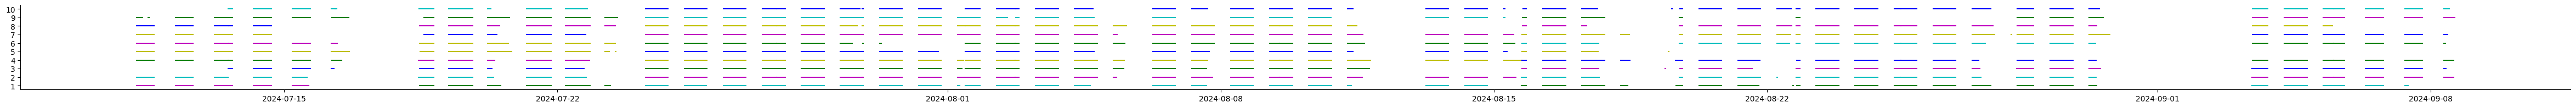

In [61]:
color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

fig, ax = plt.subplots(figsize=(60, 2))
for i, row in result_df.iterrows():
    start = row['interval'].left
    end = row['interval'].right
    color = color_map[row['color']]
    pi = row['pi']
    ax.plot([start, end], [pi, pi], color=color)

ax.set_yticks(df['pi'].unique())
ax.set_yticklabels(df['pi'].unique())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

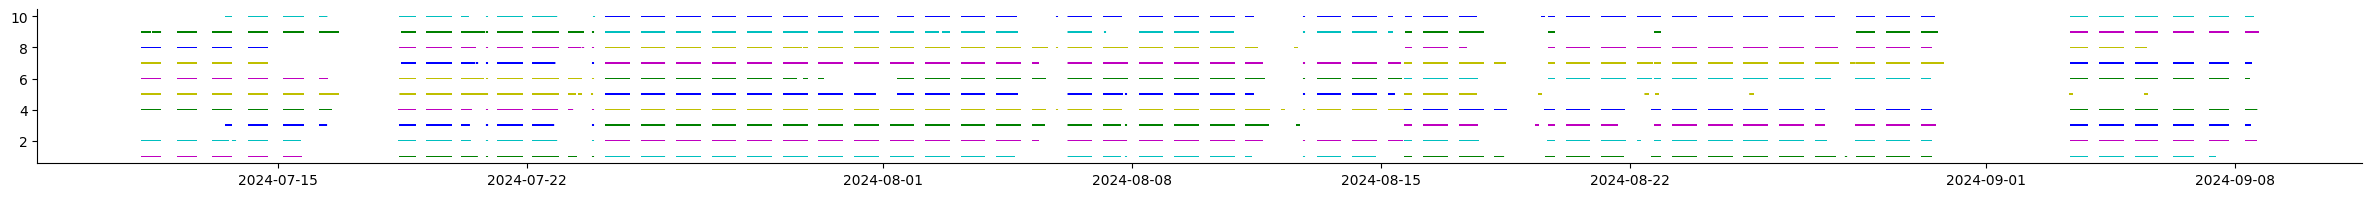

In [38]:
# color_map = {
#     'cnt': 'm',
#     'blu': 'b',
#     'blv': 'c',
#     'grn': 'g',
#     'yel': 'y'
# }

# mapped_colors = df['color'].map(color_map)


# fig, ax = plt.subplots(figsize=(30, 2))

# plt.scatter(df['datetime'], df['pi'], marker='|', c=mapped_colors, s=1)
# # ax.set_yticks(list(pi_values.values()))
# # ax.set_yticklabels(list(pi_values.keys()))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# HOURS PER TREATMENT

In [39]:
# df['color'].value_counts()/3600

color
cnt    1099.491944
blu    1036.171944
blv    1010.164722
grn     982.270278
yel     915.779444
Name: count, dtype: float64

In [40]:
# dt_treat.to_csv('treatment_times_fixed.csv', index=False)

In [41]:
# color
# cnt    1081.559167
# blu    1046.466667
# blv    1033.454444
# grn     944.829167
# yel     939.069167
# Name: count, dtype: float64

<!-- color
cnt    1081.559167
blu    1046.466667
blv    1033.454444
grn     944.829167
yel     939.069167
Name: count, dtype: float64 -->